### Komplexe Schwingung als Addition eines Sin- und Cos-Signals
$y(t)= e^{j\omega t} = cos(\omega t)+ j\cdot sin(\omega t)$. Gegeben sei $\omega=2\pi$/s (Schwingung mit 1 Hz),  t in Sekunden einstellbar

FloatSlider(value=0.125, description='t/s', max=2.0, step=0.025)

Output()

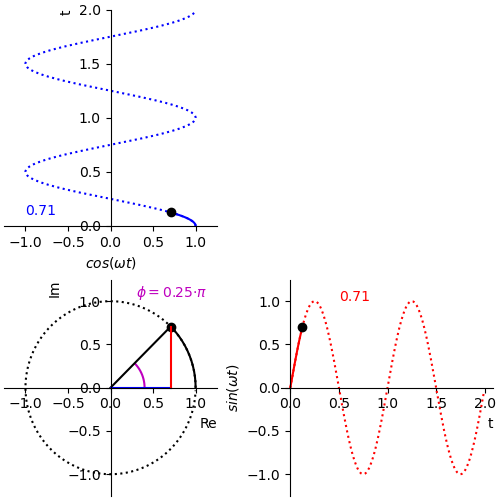

In [1]:
"""
Darstellung von Zerlegungen der Schwingungsfunktionen. 
Auch füf das Verständnis der komplexen Zahlenebene an sich/Drehwinkel verwendbar.

(c) Benno Dömer | HS Pforzheim 2023 

"""
# 'widget' für interaktive Plots
%matplotlib widget 

# Import so, dass möglichst viele Funktionen "wie in Matlab" zur Verfügung stehen:
from numpy import (pi, log10, exp, sqrt, sin, cos, tan, angle, arange, linspace, zeros, ones) # numpy für's Rechnen, bei Bedarf anpassen
from matplotlib.pyplot import (figure, plot, stem, legend, text,  
                               grid, xlabel, ylabel, subplot, title, clf, cla, xlim, ylim) # matpotlib für's  Plotten, bei Bedarf anpassen
from matplotlib.pyplot import fill_between as area # Beispiel für eine Mapping auf Matlab-Bezeichnung
import ipywidgets as widgets # interaktive Controls wie Slider, Dropdowns etc.

def myplotstyle(ax): # Hilfsfunktion, hübscht den Plot etwas auf
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))

figure(figsize=(5, 5), dpi=100, 
       layout='constrained',num='Fig1') # bei Bedarf anpassen, Achtung Tablet: Nicht über 7 Breite; Titel hinter "num", hier Leerzeichen

def plotdata(t):
    figure('Fig1')
    ymax = 1.25
    omega = 2 * pi * 1 # f=1
    tx = arange(0,2,0.01); #Matlab: tx=0:0.01:2;
    tc = arange(0,t,0.01); #Matlab: tx=0:0.01:t;
    
    ax = subplot(2,2,1)
    cla()#matplotlib löscht den Plot nicht, "hold on"-Verhalten => explizit löschen 
    plot(cos(tx*omega),tx,':b',cos(tc*omega),tc,'b',cos(t*omega),t,'ok') # Cos-Projektion oben
    ax.text(-1,.1,f'{cos(t*omega):.2f}',color='b')
    xlabel('$cos(\omega t)$')
    ylabel('t',loc='top')
    myplotstyle(ax)
    xlim(-ymax,ymax)
    ylim(0,2)
    
    ax = subplot(2,2,4)
    cla()
    plot(tx,sin(tx*omega),':r',tc,sin(tc*omega),'r',t,sin(t*omega),'ok') # Sin-Projektion rechts
    ax.text(0.5,1,f'{sin(t*omega):.2f}',color='r')
    ylim(-ymax, ymax)
    ylabel('$sin(\omega t)$')
    xlabel('t',loc='right')
    myplotstyle(ax)

    ax = subplot(2,2,3)
    cla()
    phi = t*2 # Winkel
    plot(cos(tx*pi),sin(tx*pi),':k',cos(tc*2*pi),sin(tc*2*pi),'k')
    plot(0.4*cos(tc*2*pi),0.4*sin(tc*2*pi),'m') # einen Kreis malen
    xlabel('Re',loc='right')
    ylabel('Im',loc='top')
    plot([0,cos(omega*t)],[0,sin(omega*t)],'-k',cos(omega*t),sin(omega*t),'ok',
        [0,cos(t*2*pi)],[0,0],'b',[cos(t*2*pi),cos(t*2*pi)],[0,sin(t*2*pi)],'r')
    #    [0,cos(omega*t)],[0,-sin(omega*t)],'--k',cos(omega*t),-sin(omega*t),'ok') # Zeiger zeichnen
    ax.text(0.3,1.05,'$\phi=$'+f'{phi:.2f}'+'$\cdot \pi$',color='m')
    xlim(-ymax,ymax)
    ylim(-ymax,ymax)
    
    myplotstyle(ax)
    
# Interaktion: 
# Definition von Controls: 
tslider1  = widgets.FloatSlider(min=0, max=2, step=0.025, value=0.125, continuous_update=True, description='t/s')

#Verknüpfen mit Callback
out = widgets.interactive_output(plotdata, { 't': tslider1}) 
#Anzeigen
display(tslider1,out)


### Sin und Cos als zwei gegenläufige komplexe Schwingungen
$cos(\omega t)=\frac{1}{2}(e^{j\omega t}+e^{-j\omega t})$ und $\frac{1}{2j}(e^{j\omega t}-e^{-j\omega t})$. Gegeben sei $\omega=2\pi$/s (Schwingung mit 1 Hz),  t in Sekunden einstellbar

Der durchgehende schwarze Zeiger zeigt $e^{j\omega t}$, der gestrichelte $e^{-j\omega t}$. Das blaue Kästchen markiert $e^{j\omega t}+e^{-j\omega t}$, das rote Kästchen $e^{j\omega t}-e^{-j\omega t}$.

FloatSlider(value=0.0, description='t/s', max=2.0, step=0.05)

Output()

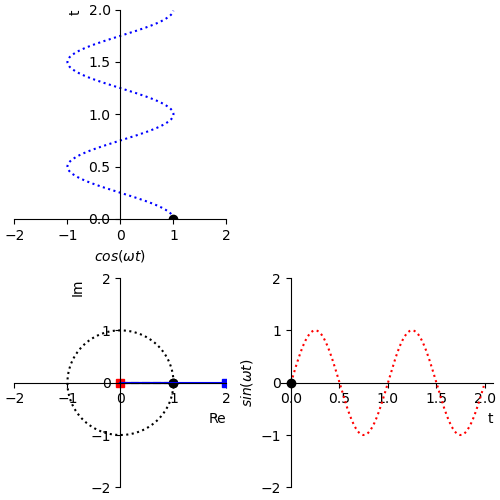

In [2]:
figure(figsize=(5, 5), dpi=100, 
       layout='constrained',num='Fig2') # bei Bedarf anpassen, Achtung Tablet: Nicht über 7 Breite; Titel hinter "num", hier Leerzeichen

# Plotbefehle werden in eine Funktion verpackt, die dann bei Interaktionen aufgerufen wird. Hier ist die Kernfunktionalität
# In Python wird statt mit Klammern oder Schlüsselwörtern wie "end" mit Einrückungen gearbeitet
def plotdata2(t):
    figure('Fig2')
    f=1
    omega = 2 * pi * f
    tx = arange(0,2,0.01); #Matlab: tx=0:0.01:2;
    tc = arange(0,t,0.01); #Matlab: tx=0:0.01:t;
    
    ax = subplot(2,2,1)
    cla()#matplotlib löscht den Plot nicht, "hold on"-Verhalten => explizit löschen 
    plot(cos(tx*omega),tx,':b',cos(tc*omega),tc,'b',cos(t*omega),t,'ok') # Cos-Projektion oben
    xlabel('$cos(\omega t)$')
    ylabel('t',loc='top')
    myplotstyle(ax)
    xlim(-2,2)
    ylim(0,2)
    
    ax = subplot(2,2,4)
    cla()
    plot(tx,sin(tx*omega),':r',tc,sin(tc*omega),'r',t,sin(t*omega),'ok') # Sin-Projektion rechts
    ylim(-2, 2)
    ylabel('$sin(\omega t)$')
    xlabel('t',loc='right')
    subplot(2,2,3)
    myplotstyle(ax)
    xlim(0,2)
    ylim(-2,2)
    
    ax = subplot(2,2,3)
    cla()
    plot(cos(tx*pi),sin(tx*pi),':k',cos(tc*2*pi),sin(tc*2*pi),'k') # einen Kreis malen
    xlabel('Re',loc='right')
    ylabel('Im',loc='top')
    plot([0,cos(omega*t)],[0,sin(omega*t)],'-k',cos(omega*t),sin(omega*t),'ok',
        [0,cos(omega*t)],[0,-sin(omega*t)],'--k',cos(omega*t),-sin(omega*t),'ok',
        2*cos(omega*t),0,'sb',0,2*sin(omega*t),'sr',
        [2*cos(omega*t),0],[0,0],'b',[0,0],[0,2*sin(omega*t)],'r') # Zeiger zeichnen
    xlim(-2,2)
    ylim(-2,2)
    
    myplotstyle(ax)


    
    
# Interaktion: 
# Definition von Controls: 
tslider2  = widgets.FloatSlider(min=0, max=2, step=0.05, value=0, continuous_update=True, description='t/s')

#Verknüpfen mit Callback
out = widgets.interactive_output(plotdata2, { 't': tslider2}) 
#Anzeigen
display(tslider2,out)

